In [29]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [4]:
df = pd.read_csv("datasets/energy-efficiency.csv")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [6]:
col_names = {
    "X1": "Relative_Compactness", 
    "X2": "Surface_Area", 
    "X3": "Wall_Area", 
    "X4": "Roof_Area", 
    "X5": "Overall_Height", 
    "X6": "Orientation", 
    "X7": "Glazing_Area", 
    "X8": "Glazing_Area_Distribution",
    "Y1": "Heating_Load",
    "Y2": "Cooling_Load"
}

df = df.rename(columns=col_names)

In [7]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


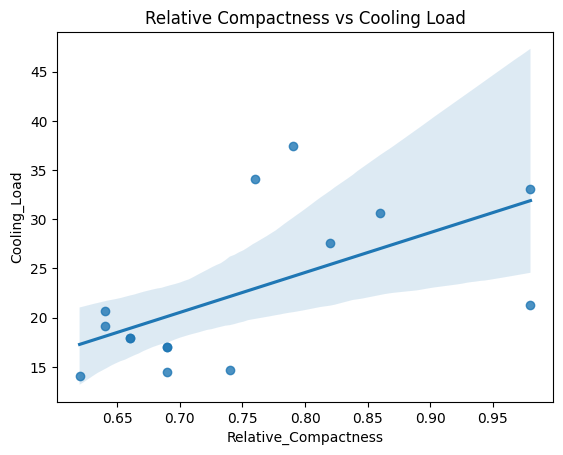

In [11]:
# make a sample of 15 data points for regplot plotting 
sample_regplot_df = df.sample(15)

# make the regplot 
sns.regplot(data=sample_regplot_df, x="Relative_Compactness", y="Cooling_Load")
plt.title("Relative Compactness vs Cooling Load");

In [16]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

In [14]:
X

array([[ 1.57587581,  0.89186302, -0.72677414, ...,  0.99455824,
        -0.29969606, -0.76176037],
       [ 0.53545875,  1.26666125, -1.77987511, ..., -0.55527309,
         0.74131982, -0.98752296],
       [-0.68627914,  0.15712792,  0.14583647, ...,  0.19791667,
        -0.40436199, -0.60747229],
       ...,
       [ 0.42796263, -0.83359828,  1.63925652, ...,  0.19188955,
        -0.5552861 , -0.16055961],
       [-0.27372925, -1.38059871,  0.14959796, ..., -0.06963345,
        -0.68363428,  0.68916446],
       [ 0.5376299 ,  0.37915312, -0.2799933 , ..., -2.39030437,
         0.91347373, -0.41222075]])

In [19]:
#Firstly, we normalise our dataset to a common scale using the min max scaler

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']
#Now, we split our dataset into the training and testing dataset. Recall that we
# had earlier segmented the features and target variables.
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)




In [23]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)


LinearRegression()

In [24]:
#obtain predictions
predicted_values = linear_model.predict(x_test)
#MAE
mae = mean_absolute_error(y_test, predicted_values)

In [25]:
mae

0.06312781382956179

In [30]:
# residual sum of squares 
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)
# root_mean_square
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

# R squared 
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) 


0.893